**Project**

How do rising sea levels correlate with global average temperatures across different years?

Can we accurately predict future temperatures prices based on historical temperature, sea level, and carbon emmission data.

In [1]:
import kagglehub

path = kagglehub.dataset_download("palinatx/mean-temperature-for-countries-by-year-2014-2022")

print(path)

!cd /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2
!ls /root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv


100%|██████████| 127k/127k [00:00<00:00, 22.3MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3
/bin/bash: line 1: cd: /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2: No such file or directory


/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv


Extract a specific country: Italy

|    |   Year |   Annual Mean |   5-yr smooth |
|---:|-------:|--------------:|--------------:|
|  0 |   1901 |       18.7055 |       18.6658 |
|  1 |   1902 |       18.531  |       18.6142 |
|  2 |   1903 |       18.5801 |       18.5651 |
|  3 |   1904 |       18.4876 |       18.5238 |
|  4 |   1905 |       18.555  |       18.4935 |


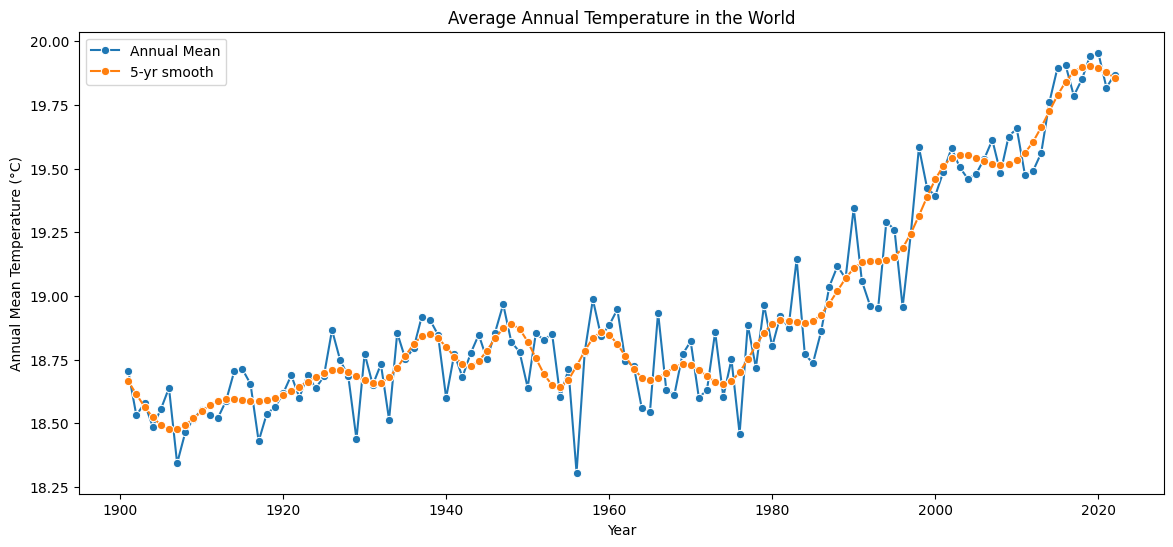

|       | Country   |   Year |   Annual Mean |   5-yr smooth | Code   |
|------:|:----------|-------:|--------------:|--------------:|:-------|
| 19642 | Italy     |   1901 |         11.53 |         11.78 | ITA    |
| 19643 | Italy     |   1902 |         11.77 |         11.77 | ITA    |
| 19644 | Italy     |   1903 |         11.83 |         11.75 | ITA    |
| 19645 | Italy     |   1904 |         12.28 |         11.74 | ITA    |
| 19646 | Italy     |   1905 |         11.67 |         11.73 | ITA    |


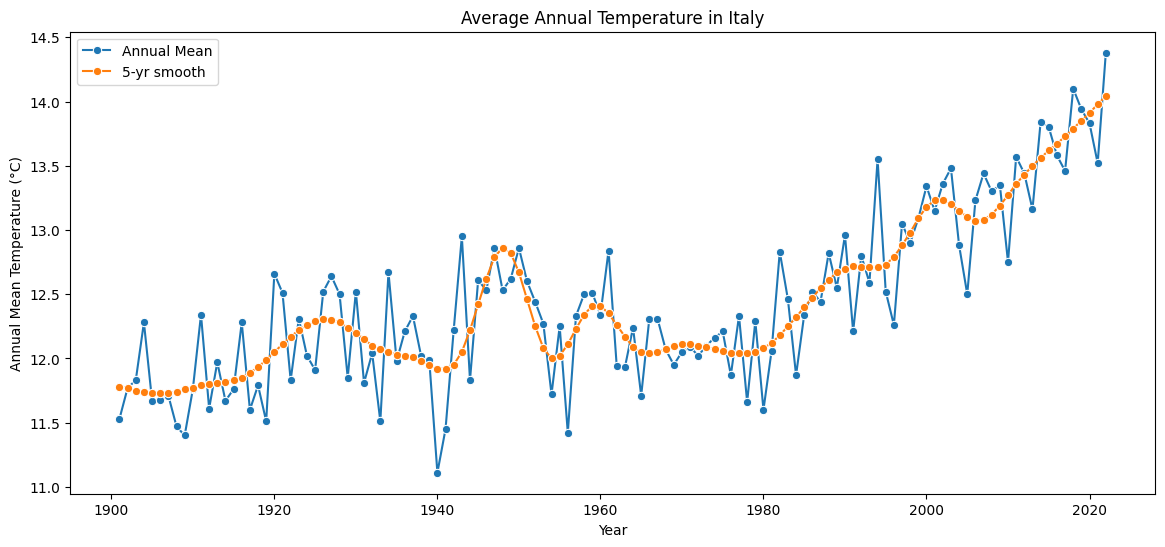

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

countryTemp = pd.read_csv('/root/.cache/kagglehub/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022/versions/3/combined_temperature.csv')
countryTemp = pd.DataFrame(countryTemp)

#Average World Temperature
worldDF = countryTemp.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean'}).reset_index()
print(worldDF.head(5).to_markdown())
plt.figure(figsize=(14, 6))
sns.lineplot(data=worldDF, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=worldDF, x='Year', y='5-yr smooth', marker='o', label='5-yr smooth')
plt.title(f'Average Annual Temperature in the World')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.show()


#Italy Temperature
italyDF = countryTemp[countryTemp['Country'] == 'Italy']
print(italyDF.head(5).to_markdown())
plt.figure(figsize=(14, 6))
sns.lineplot(data=italyDF, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=italyDF, x='Year', y='5-yr smooth', marker='o', label='5-yr smooth')
plt.title(f'Average Annual Temperature in Italy')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.show()

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')


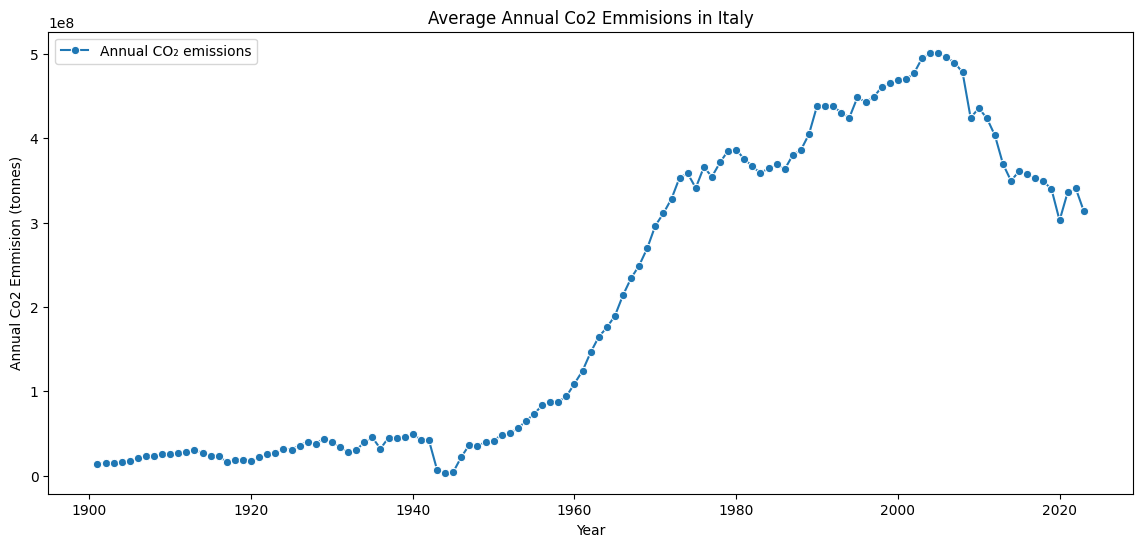

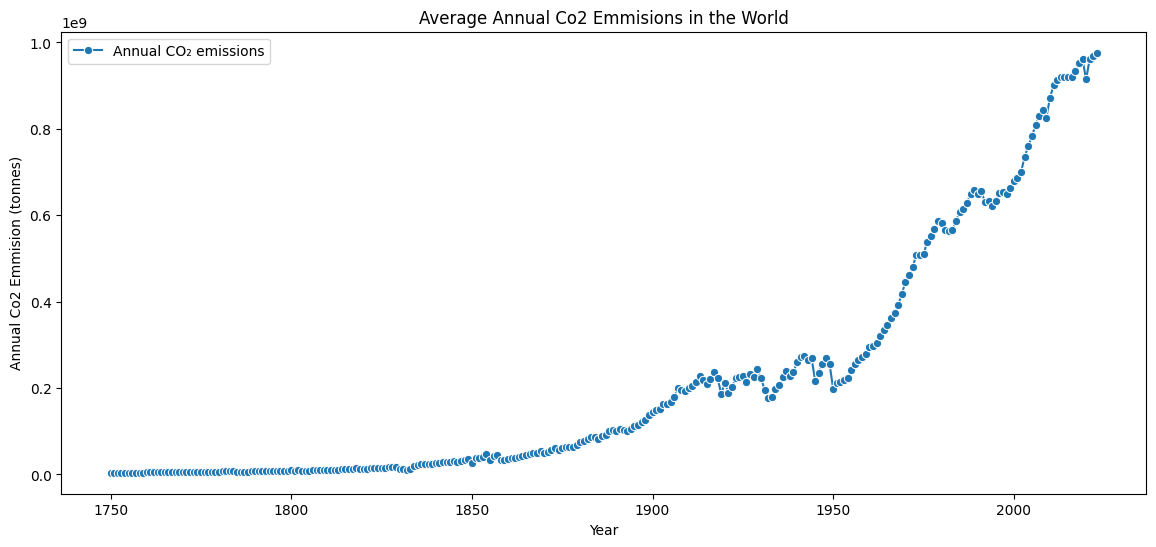

In [3]:
import os

co2emmision = pd.read_csv('annual-co2-emissions-per-country.csv')
co2emmision = pd.DataFrame(co2emmision)

print(co2emmision.columns)

#Get data for italy, make sure years mach up
italyco2 = co2emmision[co2emmision['Entity'] == 'Italy']
italyco2 = italyco2[italyco2['Year'] >= 1901]
italyco2
#Italy co2Emmisions
plt.figure(figsize=(14, 6))
sns.lineplot(data=italyco2, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'Average Annual Co2 Emmisions in Italy')
plt.ylabel('Annual Co2 Emmision (tonnes)')
plt.xlabel('Year')
plt.legend()
plt.show()


#Get data for world, make sure years mach up
worldco2 = co2emmision.groupby('Year').agg({'Annual CO₂ emissions': 'mean'}).reset_index()
#World co2Emmisions
plt.figure(figsize=(14, 6))
sns.lineplot(data=worldco2, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'Average Annual Co2 Emmisions in the World')
plt.ylabel('Annual Co2 Emmision (tonnes)')
plt.xlabel('Year')
plt.legend()
plt.show()


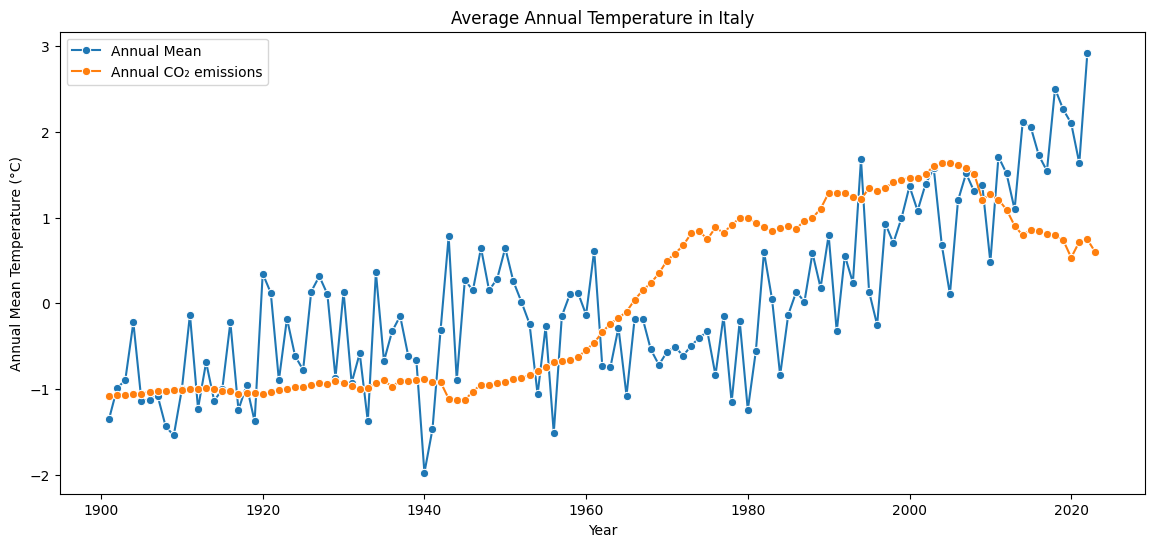

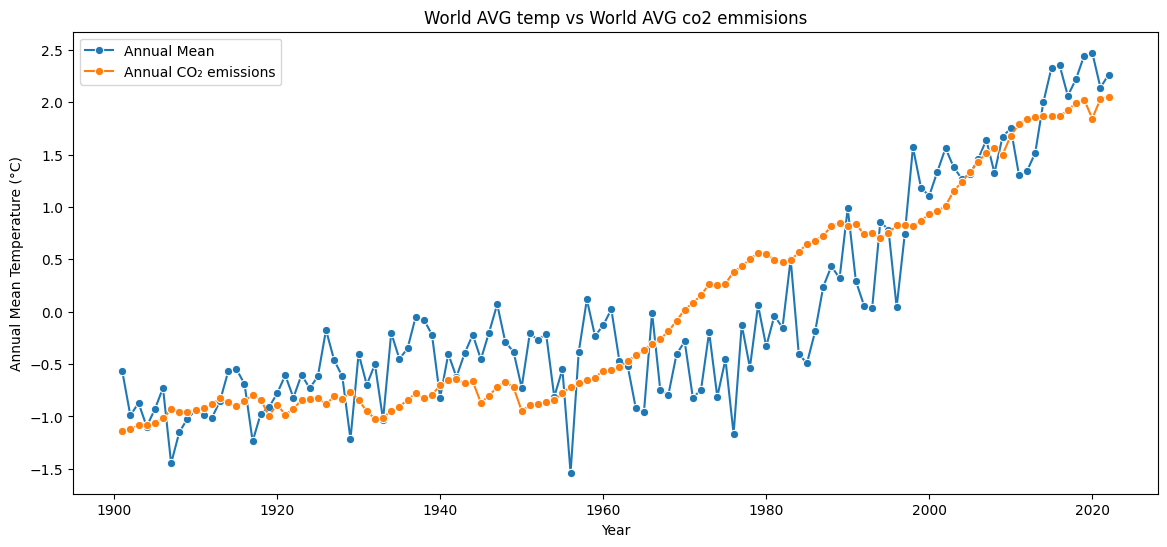

In [4]:
#ITALY DATA
#Create merged table
italyMerged = italyDF.merge(italyco2, how='outer')

#Normalize data (z-score)
italyMerged['Annual Mean'] = (italyMerged['Annual Mean'] - italyMerged['Annual Mean'].mean()) / italyMerged['Annual Mean'].std()
italyMerged['Annual CO₂ emissions'] = (italyMerged['Annual CO₂ emissions'] - italyMerged['Annual CO₂ emissions'].mean()) / italyMerged['Annual CO₂ emissions'].std()

#plotting of graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=italyMerged, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=italyMerged, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'Average Annual Temperature in Italy')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()
plt.show()



#WORLD DATA
#Create world merged table
worldMerged = worldDF.merge(worldco2, on='Year')

#Normalize data (z-score)
worldMerged['Annual Mean'] = (worldMerged['Annual Mean'] - worldMerged['Annual Mean'].mean()) / worldMerged['Annual Mean'].std()
worldMerged['Annual CO₂ emissions'] = (worldMerged['Annual CO₂ emissions'] - worldMerged['Annual CO₂ emissions'].mean()) / worldMerged['Annual CO₂ emissions'].std()

#plotting of graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=worldMerged, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=worldMerged, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
plt.title(f'World AVG temp vs World AVG co2 emmisions')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()

plt.show()

First few rows of the dataset:
     Year  Annual Mean  5-yr smooth  Annual CO₂ emissions
120  2021    19.818059    19.877353          9.621958e+08
121  2022    19.868235    19.856471          9.674599e+08

Data types of each column:
Year                      int64
Annual Mean             float64
5-yr smooth             float64
Annual CO₂ emissions    float64
dtype: object


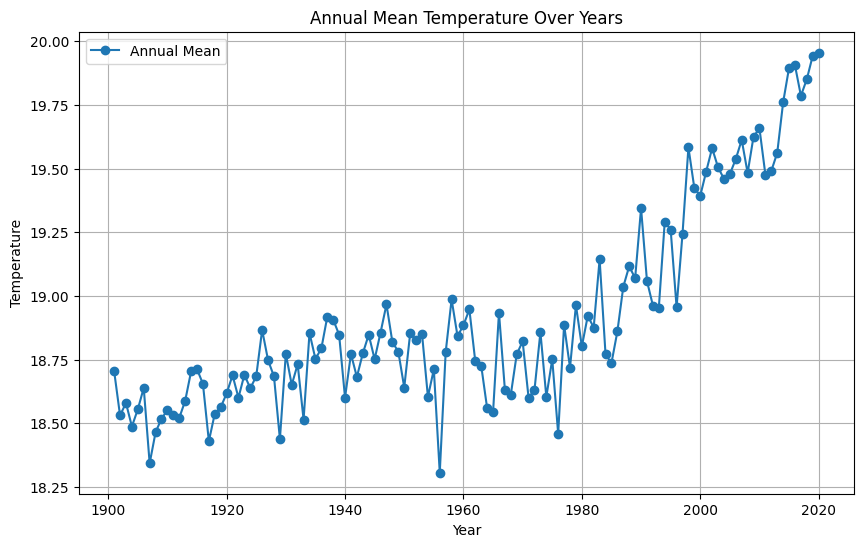

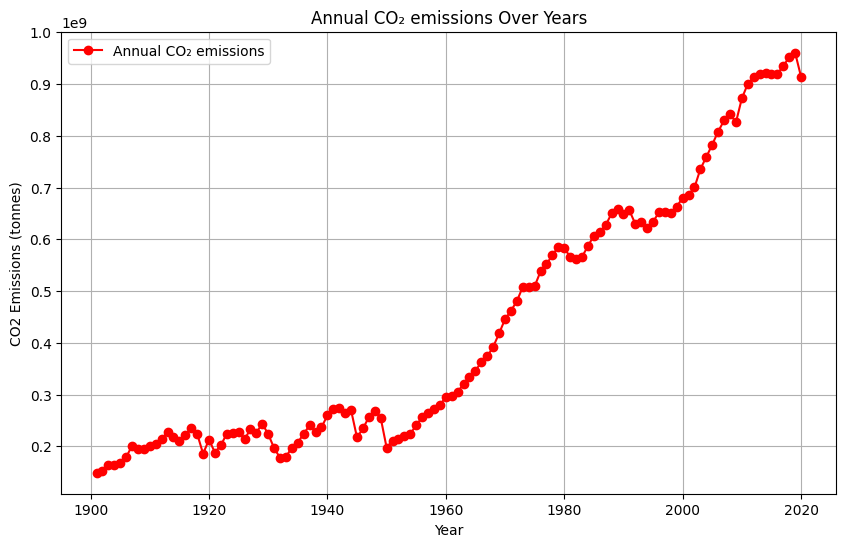


Correlation matrix:
                          Year  Annual Mean  5-yr smooth  Annual CO₂ emissions
Year                  1.000000     0.821830     0.857502              0.938677
Annual Mean           0.821830     1.000000     0.958865              0.867414
5-yr smooth           0.857502     0.958865     1.000000              0.907410
Annual CO₂ emissions  0.938677     0.867414     0.907410              1.000000


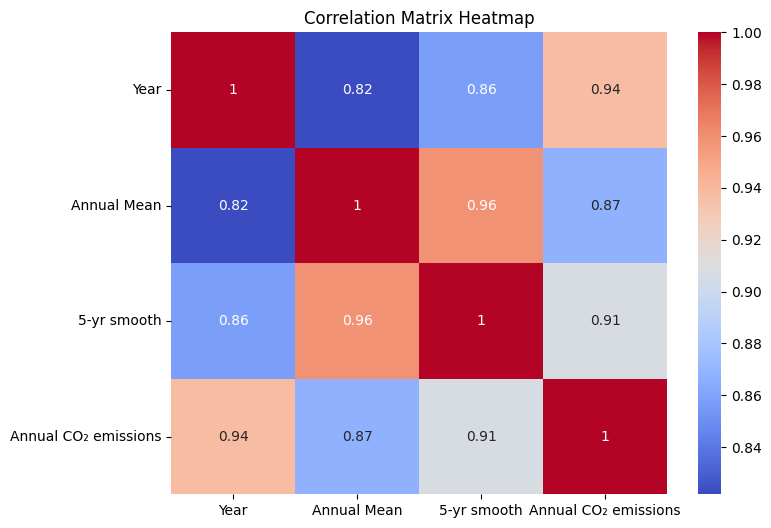


Predicted Annual Mean Temperature for 2021: 19.65707813233934

Mean Squared Error on test set: 0.03907335168585946


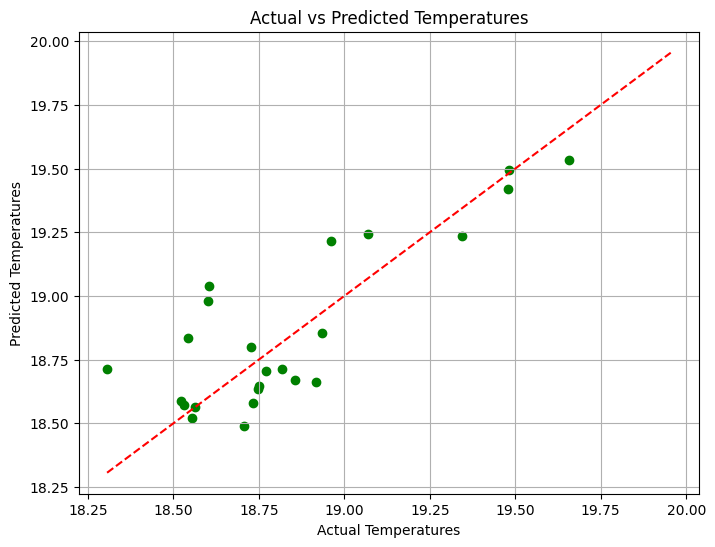

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Load and Preprocess Data

moredata = worldMerged[worldMerged['Year'] > 2020].copy()
data = worldMerged[worldMerged['Year'] <= 2020].copy()

# Display first few rows
print("First few rows of the dataset:")
print(moredata.head())

# Ensure correct data types
print("\nData types of each column:")
print(data.dtypes)

# 2. Exploratory Data Analysis
# Plot Annual Mean Temperature over Years
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Annual Mean'], marker='o', label='Annual Mean')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Temperature Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Plot Annual CO2 Emissions over Years
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Annual CO₂ emissions'], marker='o', color='red', label='Annual CO₂ emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tonnes)')
plt.title('Annual CO₂ emissions Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Check correlations
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Prepare Data for Modeling
# Define features and target
X = data[['Year', 'Annual CO₂ emissions']]
y = data['Annual Mean']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Train the Model
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Prepare the input for 2021
X_2021 = pd.DataFrame({
    'Year': [2021],
    'Annual CO₂ emissions': [9.621958e+08]
})

# Make the prediction
temperature_2021 = model.predict(X_2021)
print(f"\nPredicted Annual Mean Temperature for 2021: {temperature_2021[0]}")

# 6. Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse}")

# Plot Actual vs Predicted Temperatures
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.grid(True)
plt.show()


,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions,Global Mean Sea Level
0,1993,18.953412,19.139118,6.337637e+08,-1280.40
1,1994,19.291647,19.141176,6.214538e+08,-1145.19
2,1995,19.259765,19.154412,6.341004e+08,-1059.90
3,1996,18.956176,19.188176,6.519520e+08,-957.47
4,1997,19.243412,19.244706,6.536962e+08,-839.25
5,1998,19.583118,19.315235,6.500674e+08,-927.24
6,1999,19.423412,19.389176,6.632737e+08,-807.06
7,2000,19.393471,19.457824,6.802029e+08,-681.74
8,2001,19.488353,19.511059,6.865069e+08,-489.11
9,2002,19.580235,19.542118,7.003022e+08,-337.42


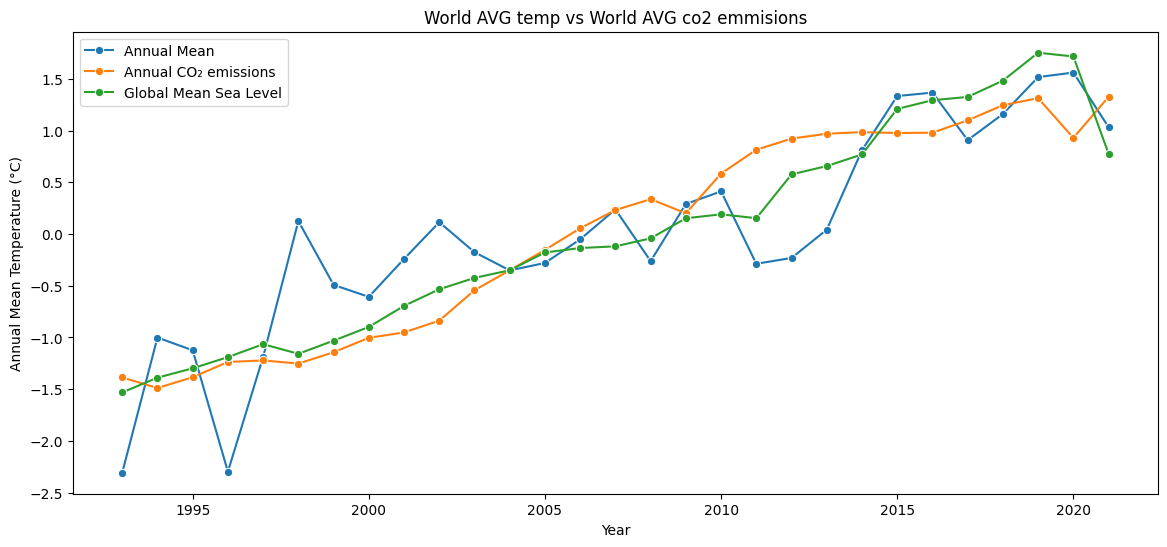

In [89]:
sealevel_data = pd.read_csv('/root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2/sealevel.csv')

del sealevel_data['StdDevGMSL_noGIA']
del sealevel_data['SmoothedGSML_noGIA']
del sealevel_data['GMSL_GIA']
del sealevel_data['StdDevGMSL_GIA']
del sealevel_data['TotalWeightedObservations']
del sealevel_data['SmoothedGSML_GIA']
del sealevel_data['SmoothedGSML_GIA_sigremoved']

sealevel_data = sealevel_data.rename(columns={
    'GMSL_noGIA': 'Global Mean Sea Level',
    'Year': 'Year'
})

finalDF = worldMerged.merge(sealevel_data, on='Year')

finalDF = finalDF.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean', 'Annual CO₂ emissions': 'mean', 'Global Mean Sea Level': 'sum'}).reset_index()

#plt.figure(figsize=(10, 8))
#sns.lineplot(data = finalDF, x='Global Mean Sea level', y='Year', marker='o')
#plt.show

display(finalDF.head(100))

finalDF = finalDF[finalDF['Year'] >= 1993]

#Normalize data (z-score)
finalDF['Annual Mean'] = (finalDF['Annual Mean'] - finalDF['Annual Mean'].mean()) / finalDF['Annual Mean'].std()
finalDF['Annual CO₂ emissions'] = (finalDF['Annual CO₂ emissions'] - finalDF['Annual CO₂ emissions'].mean()) / finalDF['Annual CO₂ emissions'].std()
finalDF['Global Mean Sea Level'] = (finalDF['Global Mean Sea Level'] - finalDF['Global Mean Sea Level'].mean()) / finalDF['Global Mean Sea Level'].std()

#plotting of graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=finalDF, x='Year', y='Annual Mean', marker='o', label='Annual Mean')
sns.lineplot(data=finalDF, x='Year', y='Annual CO₂ emissions', marker='o', label='Annual CO₂ emissions')
sns.lineplot(data=finalDF, x='Year', y='Global Mean Sea Level', marker='o', label='Global Mean Sea Level')
plt.title(f'World AVG temp vs World AVG co2 emmisions')
plt.ylabel('Annual Mean Temperature (°C)')
plt.xlabel('Year')
plt.legend()

,Year,Annual Mean,5-yr smooth,Global Mean Sea Level
0,1993,18.953412,19.139118,-38.59
1,1993,18.953412,19.139118,-41.97
2,1993,18.953412,19.139118,-41.93
3,1993,18.953412,19.139118,-42.67
4,1993,18.953412,19.139118,-37.86
...,...,...,...,...
1043,2021,19.818059,19.877353,49.26
1044,2021,19.818059,19.877353,50.49
1045,2021,19.818059,19.877353,49.65
1046,2021,19.818059,19.877353,47.46


First few rows of the dataset:
    Year  Annual Mean  5-yr smooth  Global Mean Sea Level
28  2021    19.818059    19.877353                 900.56

Data types of each column:
Year                       int64
Annual Mean              float64
5-yr smooth              float64
Global Mean Sea Level    float64
dtype: object


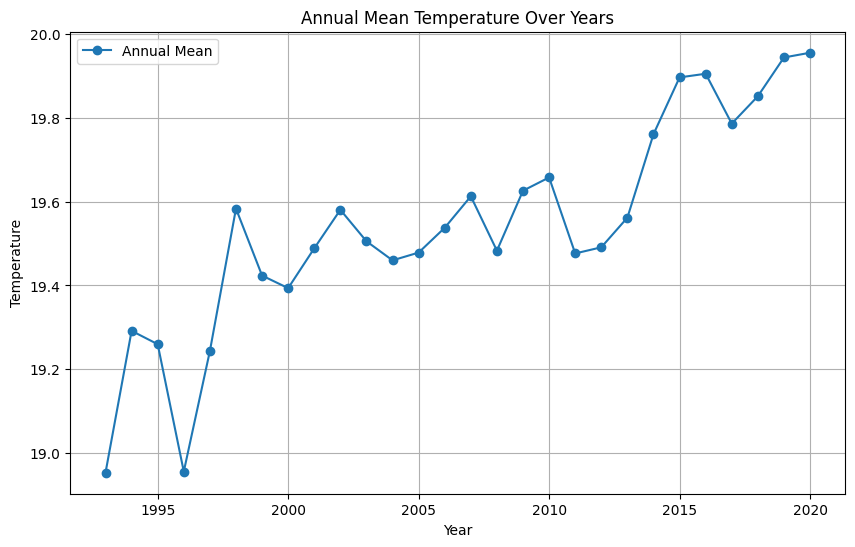

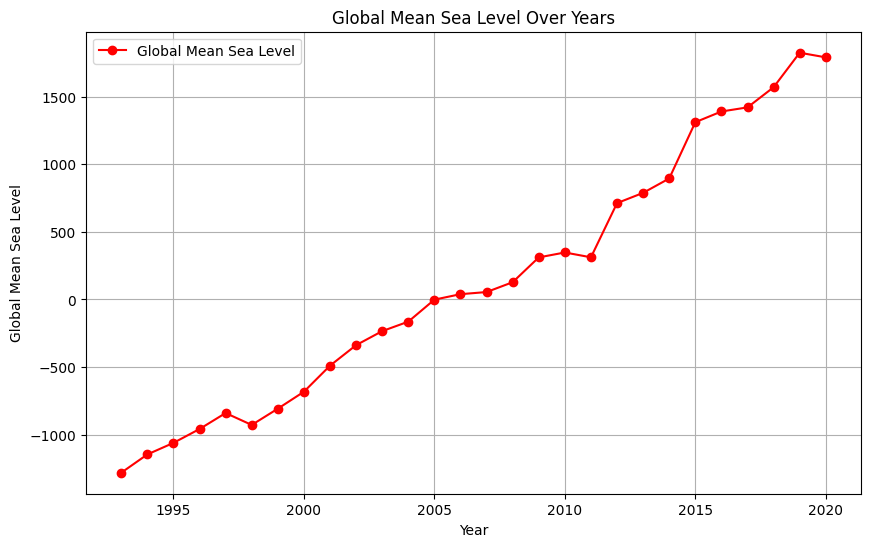


Correlation matrix:
                           Year  Annual Mean  5-yr smooth  \
Year                   1.000000     0.876042     0.954491   
Annual Mean            0.876042     1.000000     0.907853   
5-yr smooth            0.954491     0.907853     1.000000   
Global Mean Sea Level  0.989610     0.878482     0.958030   

                       Global Mean Sea Level  
Year                                0.989610  
Annual Mean                         0.878482  
5-yr smooth                         0.958030  
Global Mean Sea Level               1.000000  


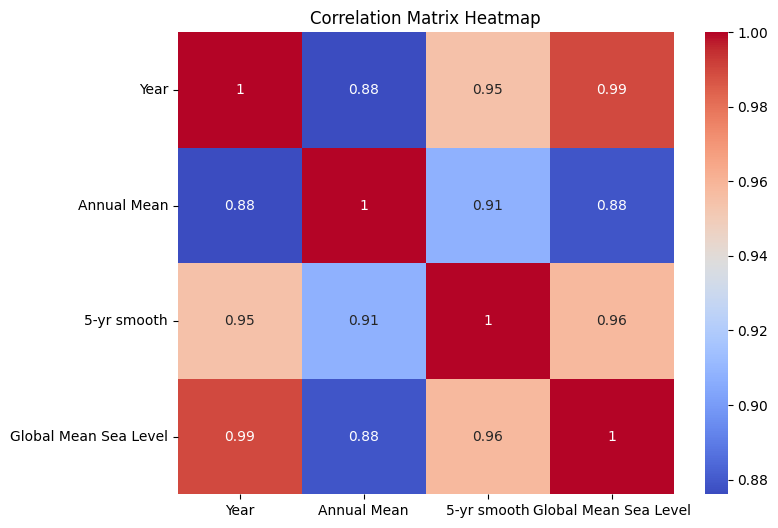


Predicted Annual Mean Temperature for 2021: 19.721446085575636

Mean Squared Error on test set: 0.017142753847111943


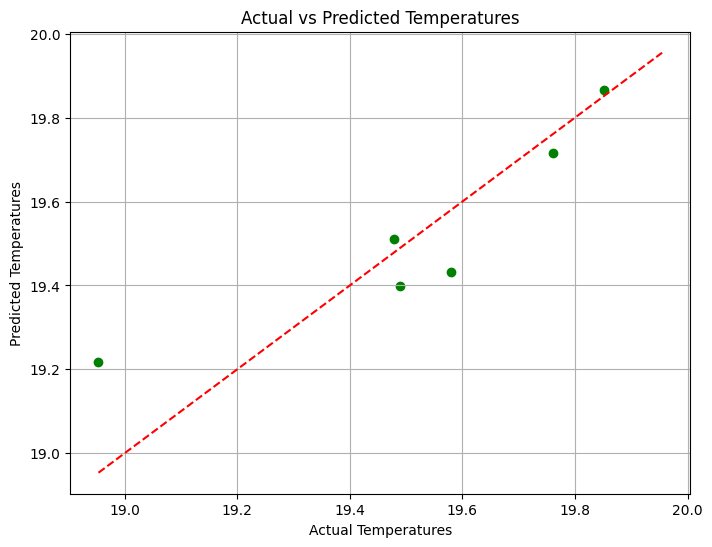

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Load and Preprocess Data

finalDF = worldDF.merge(sealevel_data, on='Year')
finalDF = finalDF.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean', 'Global Mean Sea Level': 'sum'}).reset_index()

display(worldMerged)

moredata = finalDF[finalDF['Year'] > 2020].copy()
data = finalDF[finalDF['Year'] <= 2020].copy()

# Display first few rows
print("First few rows of the dataset:")
print(moredata.head())

# Ensure correct data types
print("\nData types of each column:")
print(data.dtypes)

# 2. Exploratory Data Analysis
# Plot Annual Mean Temperature over Years
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Annual Mean'], marker='o', label='Annual Mean')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Temperature Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Plot Annual CO2 Emissions over Years
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Global Mean Sea Level'], marker='o', color='red', label='Global Mean Sea Level')
plt.xlabel('Year')
plt.ylabel('Global Mean Sea Level')
plt.title('Global Mean Sea Level Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Check correlations
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Prepare Data for Modeling
# Define features and target
X = data[['Year', 'Global Mean Sea Level']]
y = data['Annual Mean']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Train the Model
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Prepare the input for 2021
X_2021 = pd.DataFrame({
    'Year': [2021],
    'Global Mean Sea Level': [900.56]
})

# Make the prediction
temperature_2021 = model.predict(X_2021)
print(f"\nPredicted Annual Mean Temperature for 2021: {temperature_2021[0]}")

# 6. Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse}")

# Plot Actual vs Predicted Temperatures
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.grid(True)
plt.show()


,Year,Annual Mean,5-yr smooth,Annual CO₂ emissions,Global Mean Sea Level
0,1993,18.953412,19.139118,6.337637e+08,-1280.40
1,1994,19.291647,19.141176,6.214538e+08,-1145.19
2,1995,19.259765,19.154412,6.341004e+08,-1059.90
3,1996,18.956176,19.188176,6.519520e+08,-957.47
4,1997,19.243412,19.244706,6.536962e+08,-839.25
5,1998,19.583118,19.315235,6.500674e+08,-927.24
6,1999,19.423412,19.389176,6.632737e+08,-807.06
7,2000,19.393471,19.457824,6.802029e+08,-681.74
8,2001,19.488353,19.511059,6.865069e+08,-489.11
9,2002,19.580235,19.542118,7.003022e+08,-337.42


First few rows of the dataset:
    Year  Annual Mean  5-yr smooth  Annual CO₂ emissions  \
28  2021    19.818059    19.877353          9.621958e+08   

    Global Mean Sea Level  
28                 900.56  

Data types of each column:
Year                       int64
Annual Mean              float64
5-yr smooth              float64
Annual CO₂ emissions     float64
Global Mean Sea Level    float64
dtype: object

Correlation matrix:
                           Year  Annual Mean  5-yr smooth  \
Year                   1.000000     0.876042     0.954491   
Annual Mean            0.876042     1.000000     0.907853   
5-yr smooth            0.954491     0.907853     1.000000   
Annual CO₂ emissions   0.976563     0.794283     0.894109   
Global Mean Sea Level  0.989610     0.878482     0.958030   

                       Annual CO₂ emissions  Global Mean Sea Level  
Year                               0.976563               0.989610  
Annual Mean                        0.794283               0

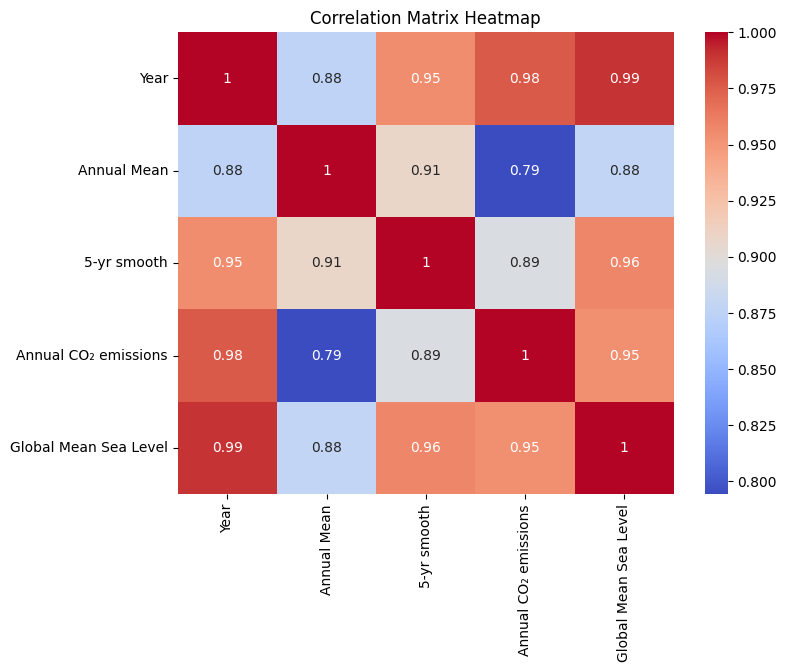


Predicted Annual Mean Temperature for 2021: 20.01154053585708

Mean Squared Error on test set: 0.0062248292303784735


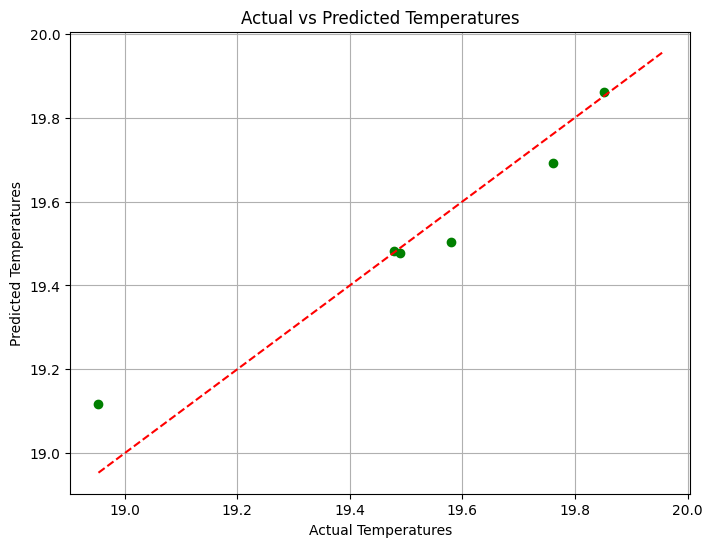

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

sealevel_data = pd.read_csv('/root/.cache/kagglehub/datasets/kkhandekar/global-sea-level-1993-2021/versions/2/sealevel.csv')
worldMerged = worldDF.merge(worldco2, on='Year')

del sealevel_data['StdDevGMSL_noGIA']
del sealevel_data['SmoothedGSML_noGIA']
del sealevel_data['GMSL_GIA']
del sealevel_data['StdDevGMSL_GIA']
del sealevel_data['TotalWeightedObservations']
del sealevel_data['SmoothedGSML_GIA']
del sealevel_data['SmoothedGSML_GIA_sigremoved']

sealevel_data = sealevel_data.rename(columns={
    'GMSL_noGIA': 'Global Mean Sea Level',
    'Year': 'Year'
})

finalDF = worldMerged.merge(sealevel_data, on='Year')

finalDF = finalDF.groupby('Year').agg({'Annual Mean': 'mean', '5-yr smooth': 'mean', 'Annual CO₂ emissions': 'mean', 'Global Mean Sea Level': 'sum'}).reset_index()
display(finalDF)

moredata = finalDF[finalDF['Year'] > 2020].copy()
data = finalDF[finalDF['Year'] <= 2020].copy()

# Display first few rows
print("First few rows of the dataset:")
print(moredata.head())

# Ensure correct data types
print("\nData types of each column:")
print(data.dtypes)

# Check correlations
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Prepare Data for Modeling
# Define features and target
X = data[['Year', 'Global Mean Sea Level', 'Annual CO₂ emissions']]
y = data['Annual Mean']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Train the Model
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Prepare the input for 2021
X_2021 = pd.DataFrame({
    'Year': [2021],
    'Global Mean Sea Level': [900.56],
    'Annual CO₂ emissions': [9.621958e+08]

})

# Make the prediction
temperature_2021 = model.predict(X_2021)
print(f"\nPredicted Annual Mean Temperature for 2021: {temperature_2021[0]}")

# 6. Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set: {mse}")

# Plot Actual vs Predicted Temperatures
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.grid(True)
plt.show()
